  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=13e1c20e8ffc7395b6ed763bc6c4b3386245ff432421b3a9c93f91da1ee47ef5
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313471 sha256=213f115472d3676e7a083ebc9a3e6fa76ffb37f74c8c8b1c9b1447573e682b1b
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext

Loading models...


Comparing Word2Vec (Navec

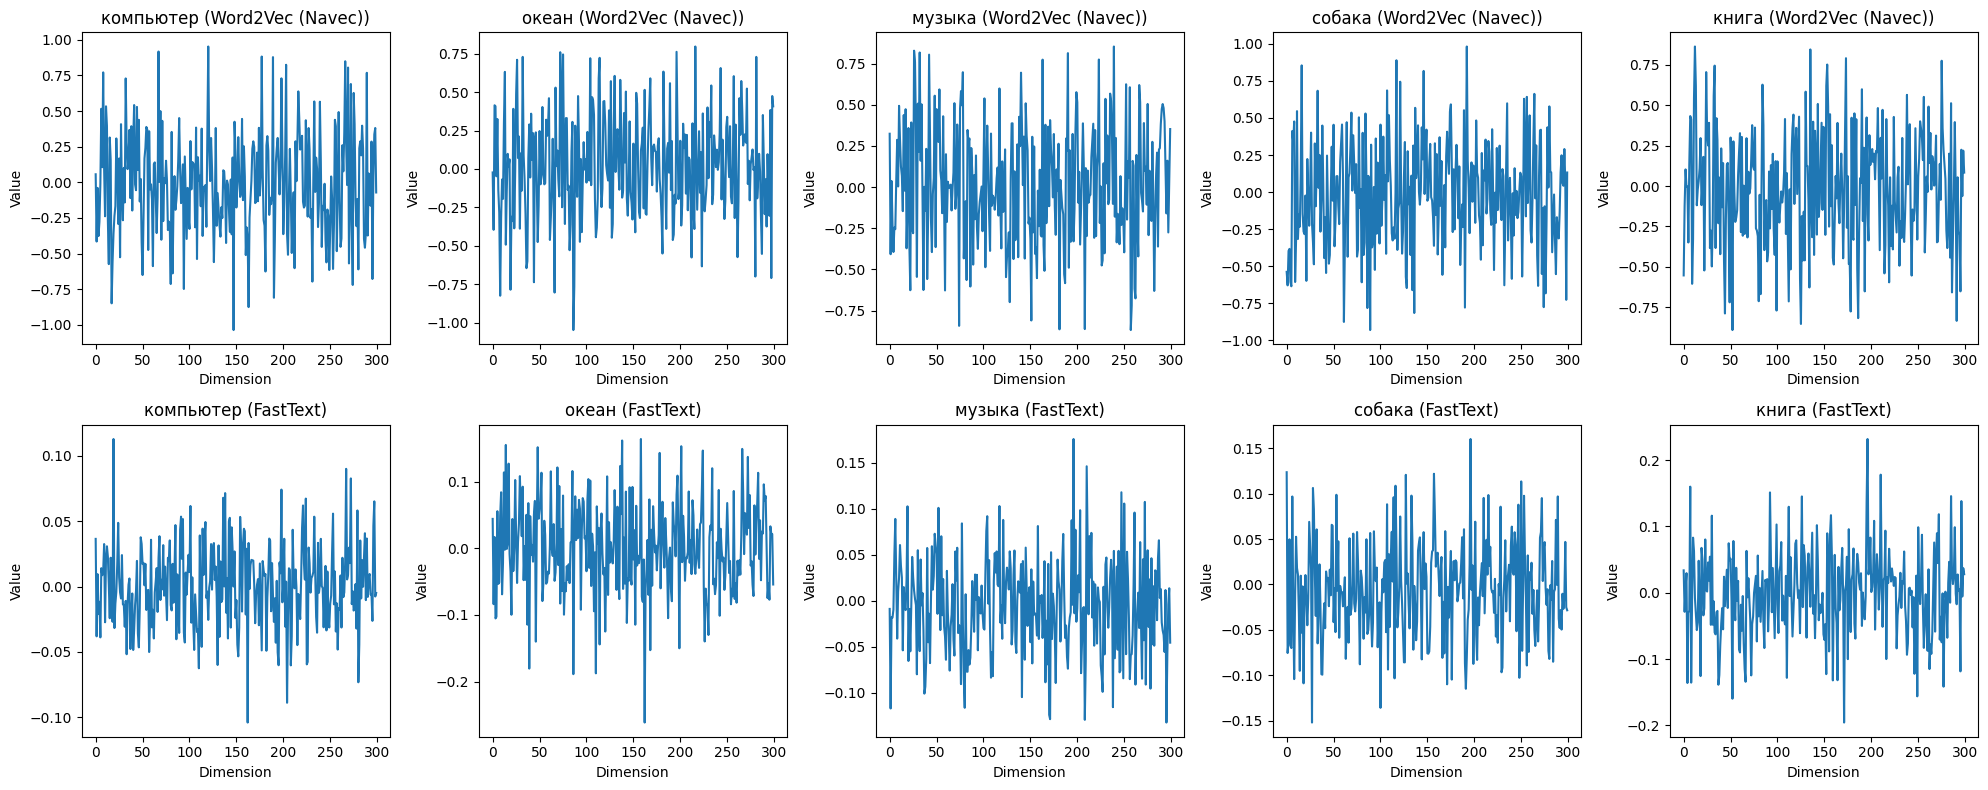

In [1]:
!pip install navec
!pip install wget
!pip install fasttext

import navec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import wget
import os
import fasttext.util

if not os.path.exists('models'):
    os.makedirs('models')

navec_path = 'models/navec_hudlit_v1_12B_500K_300d_100q.tar'
if not os.path.exists(navec_path):
    print("Downloading Navec model...")
    wget.download('https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar', navec_path)

print("\nLoading models...")
navec = navec.Navec.load(navec_path)

print("Downloading FastText model...")
fasttext.util.download_model('ru', if_exists='ignore')
ft_model = fasttext.load_model('cc.ru.300.bin')

def get_cosine_similarity(word1, word2, model, model_type='navec'):
    try:
        if model_type == 'navec':
            vec1 = model[word1]
            vec2 = model[word2]
        else:  # fasttext
            vec1 = model.get_word_vector(word1)
            vec2 = model.get_word_vector(word2)
        return cosine_similarity([vec1], [vec2])[0][0]
    except KeyError:
        return "Word not found in vocabulary"

print("\nComparing Word2Vec (Navec) and FastText:")
pairs = [
    ("любовь", "дружба"),
    ("наука", "магия")
]

for word1, word2 in pairs:
    navec_sim = get_cosine_similarity(word1, word2, navec, 'navec')
    ft_sim = get_cosine_similarity(word1, word2, ft_model, 'fasttext')
    print(f"\n{word1} - {word2}:")
    print(f"Word2Vec (Navec): {navec_sim:.4f}")
    print(f"FastText: {ft_sim:.4f}")

words = ["компьютер", "океан", "музыка", "собака", "книга"]

def plot_word_vectors(words, models, model_names):
    fig, axes = plt.subplots(len(models), len(words), figsize=(20, 8))

    for i, (model, model_name) in enumerate(zip(models, model_names)):
        for j, word in enumerate(words):
            try:
                if model_name == 'Word2Vec (Navec)':
                    vector = model[word]
                else:
                    vector = model.get_word_vector(word)

                axes[i, j].plot(range(len(vector)), vector)
                axes[i, j].set_title(f"{word} ({model_name})")
                axes[i, j].set_xlabel("Dimension")
                axes[i, j].set_ylabel("Value")
            except KeyError:
                print(f"Word '{word}' not found in {model_name} vocabulary")

    plt.tight_layout()
    plt.show()

plot_word_vectors(words, [navec, ft_model], ['Word2Vec (Navec)', 'FastText'])

similar_pairs = [
    ("компьютер", "ноутбук"),
    ("океан", "море"),
    ("собака", "кошка")
]

distant_pairs = [
    ("компьютер", "океан"),
    ("музыка", "собака"),
    ("книга", "ноутбук")
]

print("\nComparing similar word pairs:")
for word1, word2 in similar_pairs:
    navec_sim = get_cosine_similarity(word1, word2, navec, 'navec')
    ft_sim = get_cosine_similarity(word1, word2, ft_model, 'fasttext')
    print(f"\n{word1} - {word2}:")
    print(f"Word2Vec (Navec): {navec_sim:.4f}")
    print(f"FastText: {ft_sim:.4f}")

print("\nComparing distant word pairs:")
for word1, word2 in distant_pairs:
    navec_sim = get_cosine_similarity(word1, word2, navec, 'navec')
    ft_sim = get_cosine_similarity(word1, word2, ft_model, 'fasttext')
    print(f"\n{word1} - {word2}:")
    print(f"Word2Vec (Navec): {navec_sim:.4f}")
    print(f"FastText: {ft_sim:.4f}")

In [2]:
# Анализ тематически схожих пар
similar_pairs = [
    ("компьютер", "ноутбук"),
    ("океан", "море"),
    ("собака", "кошка")
]
distant_pairs = [
    ("компьютер", "океан"),
    ("музыка", "собака"),
    ("книга", "ноутбук")
]
print("\nСравнение тематически схожих пар:")
for word1, word2 in similar_pairs:
    similarity = get_cosine_similarity(word1, word2, navec)
    print(f"{word1} - {word2}: {similarity}")
print("\nСравнение далеких по смыслу пар:")
for word1, word2 in distant_pairs:
    similarity = get_cosine_similarity(word1, word2, navec)
    print(f"{word1} - {word2}: {similarity}")


Сравнение тематически схожих пар:
компьютер - ноутбук: 0.6776756048202515
океан - море: 0.6802082657814026
собака - кошка: 0.6713004112243652

Сравнение далеких по смыслу пар:
компьютер - океан: 0.12913456559181213
музыка - собака: 0.1301678717136383
книга - ноутбук: 0.14431169629096985
